# Clustering whisky distilleries according to tasting Profiles

###### Use K-Means clustering to cluster whisky distilleries by their tasting profile.

##### Getting the data

In [1]:
# Getting the dataset
import pandas as pd

dataset =pd.read_csv("data/whisky.csv")

dataset.head(3)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320


##### A look at the data

In [2]:
# dataset total columns and rows
dataset.shape

(86, 17)

In [3]:
# description of taste features
dataset[dataset.columns[2:-3]].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000


##### Spliting the dataset

In [4]:
X = dataset[dataset.columns[2:-3]]
y = pd.DataFrame(dataset["Distillery"])

##### View of the split dataset

In [5]:
X.head(3)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2


In [6]:
y.head(3)

,Distillery
0,Aberfeldy
1,Aberlour
2,AnCnoc


##### Feature scaling and transformation

In [7]:
# Transforming categorical to numerical
y["Distillery"] = pd.Categorical(dataset["Distillery"])
y["Distillery"] = y["Distillery"].cat.codes

# A view of the dataframe with a new feature
y.head(3)

,Distillery
0,0
1,1
2,2


Normalize a group of observations on a per feature basis.

Before running k-means, it is beneficial to rescale each feature dimension of the observation set with whitening.

Each feature is divided by its standard deviation across all observations to give it unit variance.

In [8]:
# Scaling features
from scipy.cluster.vq import whiten

X_scaled = pd.DataFrame(whiten(X.values), columns=X.columns)

X_scaled.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2.162197,2.804638,2.329435,0.000000,0.0,2.357935,1.28187,2.156750,2.448166,3.197822,2.5810,2.352855
1,3.243295,4.206957,1.164717,0.000000,0.0,4.715870,3.84561,2.156750,2.448166,4.796732,3.8715,2.352855
2,1.081098,4.206957,2.329435,0.000000,0.0,2.357935,0.00000,0.000000,2.448166,3.197822,3.8715,2.352855
3,4.324394,1.402319,4.658869,4.063969,0.0,0.000000,2.56374,0.000000,1.224083,3.197822,1.2905,0.000000
4,2.162197,2.804638,2.329435,0.000000,0.0,1.178967,1.28187,1.078375,2.448166,4.796732,1.2905,1.176428


**Using the elbow method to find the optimal number of clusters.**

If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is 
a good indication that the underlying model fits best at that point. 

In the visualizer “elbow” will be annotated with a dashed line.

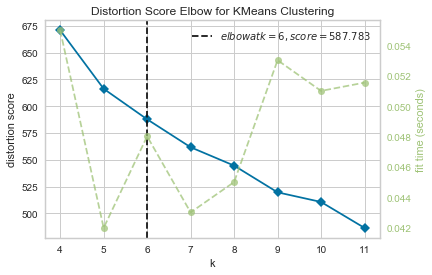

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(max_iter=500, random_state=4)

#Fit the KMeans model for a range of K values from 3 to 12
visualizer = KElbowVisualizer(model, k=(4,12))

# Fit the data to the visualizer
visualizer.fit(X_scaled.values) 

 # Finalize and render the figure
visualizer.show()

From the above visualisation **6** is the **optimal number of clusters** when using the elbow method.

**Using the silhouette method to find the optimal number of clusters.**

 The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering

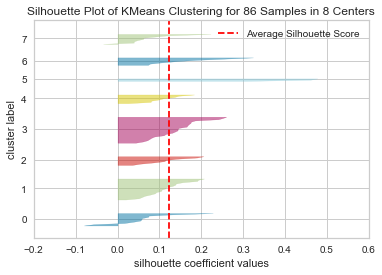

In [10]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model_2 = KMeans(random_state=42)
visualizer = SilhouetteVisualizer(model_2, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visually evaluating the density and separation between clusters.

##### Building a Cluster Model

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=6, max_iter=500, random_state=4).fit(X)

In [13]:
kmeans.labels_

array([3, 3, 5, 2, 4, 5, 5, 1, 5, 0, 1, 3, 3, 5, 3, 3, 5, 3, 4, 0, 5, 2,
       5, 2, 3, 0, 1, 1, 5, 3, 5, 3, 4, 5, 0, 5, 0, 5, 3, 4, 5, 5, 1, 3,
       1, 5, 5, 5, 3, 5, 0, 1, 3, 4, 5, 0, 3, 2, 2, 5, 5, 3, 1, 0, 5, 1,
       0, 4, 0, 5, 1, 3, 5, 5, 4, 3, 0, 2, 5, 0, 0, 5, 4, 5, 4, 5])

In [22]:
# Prediction whisky distilleries clusters
whisky_cluster = []

for i in range(len(X_scaled)):
    whisky_cluster.append(list(kmeans.predict([X_scaled.iloc[i].values])))
    
dataset["whisky_cluster"] = whisky_cluster

In [24]:
dataset

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,whisky_cluster
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,[3]
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,[3]
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,[5]
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,[2]
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,[3]
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,[5]
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,[5]
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,[1]
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,[5]
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,[0]


In [15]:
kmeans.cluster_centers_

array([[ 1.84615385e+00,  2.00000000e+00,  1.76923077e+00,
         9.23076923e-01,  7.69230769e-02,  4.61538462e-01,
         1.76923077e+00,  3.84615385e-01,  1.69230769e+00,
         1.30769231e+00,  2.00000000e+00,  1.69230769e+00],
       [ 3.10000000e+00,  2.60000000e+00,  1.60000000e+00,
         1.00000000e-01, -1.38777878e-17,  1.60000000e+00,
         1.60000000e+00,  2.70000000e+00,  1.90000000e+00,
         1.80000000e+00,  2.20000000e+00,  1.10000000e+00],
       [ 3.66666667e+00,  1.50000000e+00,  3.66666667e+00,
         3.33333333e+00,  6.66666667e-01,  1.66666667e-01,
         1.66666667e+00,  5.00000000e-01,  1.16666667e+00,
         1.33333333e+00,  1.16666667e+00,  1.66666667e-01],
       [ 2.44444444e+00,  2.27777778e+00,  1.33333333e+00,
         5.55555556e-02,  5.55555556e-02,  2.05555556e+00,
         1.66666667e+00,  1.33333333e+00,  1.88888889e+00,
         2.22222222e+00,  2.05555556e+00,  2.16666667e+00],
       [ 1.88888889e+00,  2.22222222e+00,  2.0000000